 # Time Series Analysis of Currency Valuation

![title](header.png)

<p> <font style="FONT-SIZE:15px; COLOR:#000000; LINE-HEIGHT:25px; FONT-FAMILY:Arial,Helvetica,sans-serif">
    &emsp;&emsp;From answering simple questions like "Is the market over-priced?", "Do the rates of interest accurately reflect the strength of the economy?" to answering some complicated policy questions, analyzing the valuation of a currency goes a long way. Currency analysis, coupled with forecast, enables economists study the factors responsible for the state of the market. Quantative evaluation of the economy is very commonly referred to as 'Technical Analysis'. This particularly python script and corresponding analysis is a very small subset of this technical analysis. As we go through this script, it is important to remember that the intention of this study is to demonstrate one aspect in the analysis of 'time series' using financial data, and not to provide any expert information about financial analysis.
   
</p>
<br>
<p>
    &emsp; &emsp; In this study, valuation of the Indian National Rupee (INR) has been analyzed against the US Dollar (USD). The rupee has been struggling of late. About a year ago, the rupee stood at a value of about of 64 against the dollar, but has now weakened to almost 70 per dollar. The data was obtained from 'https://www.exchangerates.org.uk/USD-INR-exchange-rate-history.html', using a python script, 'get_data_01.py', which scrapes 180 points from the immediate past. Among other things, this webpage maintains the closing rates of the dollar against the rupee. A benefit of scraping this data from a website is 'dynamic analysis'. In other words, if we store this data locally on a machine, we would not be able update the analysis with the latest rates. For example, if this script is run now, the latest value will be today's.
</p>
<br>
<p>
    &emsp;&emsp; The concepts used in this analysis are regularly used in time series analysis. We begin by visualizing the obtained series. Various statistical properties of the series have been found out to explain the behavior of the series. Before moving on to building models, it is important to make the series behave like a stationary series. A stationary time series eliminates the effect of trend, seasonality and variance (any possible noise) on the final model. In an effort to make the series weakly stationary, various techniques have been tried. Each method has been analyzed statistically to find the series which behaves the most like a stationary series. After selecting the best method, the entire data series is transformed. Usually after this, the autocorrelation function (ACF) and the partial autocorrelation function (PACF) are found to study any possible correlations with the lagged values of the series. Results from ACF and PACF are then piped into possible models studied for analysis.
</p>
</font style>

## Index
<br>

<font style="FONT-SIZE:15px; COLOR:#000000; LINE-HEIGHT:25px; FONT-FAMILY:Arial,Helvetica,sans-serif">

1. [Import required modules](#import_modules)
2. [Scrape data from source](#scrape)
3. [Visualize, describe data](#viz)
4. [Stationarity analysis](#stat) <br>
    4.1. [Moving average](#ma)<br>
    4.2. [Moving average of logarithmic transform](#malog)<br>
    4.3. [Exponentially weighted moving average](#ewma)<br>
    4.4. [First order differencing](#diff)<br>
    4.5. [Seasonal decomposition](#decomp)
5. [Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)](#acf)
6. [One-day-ahead forecast](#model)<br>
    6.1. [Autoregressive Integrated Moving Average (ARIMA)](#arima)<br>
    6.2. [Feedforward Neural Network (FNN)](#fnn)<br>
    6.3. [Recurrent Neural Network](#rnn)<br>
    6.4. [Long Short Term Memory (LSTM)](#lstm)
    


<a id='import_modules'></a>
## Import the required modules

"statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration." <br>
Ref: https://www.statsmodels.org

<br>

In the current study, majority of statistical analysis is done using this module. Other than that, other Python modules like Numpy, Matplotlib, Pandas are also used.

For building neural networks, the module Keras is used.
"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research." <br>
Ref: https://keras.io/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

from  keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras import layers
from keras.initializers import Zeros
from keras.callbacks import EarlyStopping
from keras.models import load_model


# Set random seed
np.random.seed(0)

C:\Users\kdabhadk\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [3]:
from  keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras import layers
from keras.initializers import Zeros

In [4]:
# Set figure size for all matplotlib figures
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5

<a id='scrape'></a>
## Scrap Data from Source

In [5]:
# Use the script generated to scrap the rate data. Open get_data.py to see how that is done.
# Data source: 'https://www.exchangerates.org.uk/USD-INR-exchange-rate-history.html'
from getdata_01 import *
rate_data = get_data()

<a id='viz'></a>
## Visualization and Data Description

In [6]:
rate_data.head()

Rate
Day                
2018-02-28  65.2619
2018-03-01  65.1559
2018-03-02  65.1967
2018-03-03  65.1953
2018-03-04  65.1967

In [7]:
rate_data.tail()

Rate
Day                
2018-08-22  69.7988
2018-08-23  70.2874
2018-08-24  69.7753
2018-08-25  69.7753
2018-08-26  69.7745

In [8]:
rate_data.describe()

Rate
count  180.000000
mean    67.281803
std      1.606215
min     64.706800
25%     65.256450
50%     67.561050
75%     68.550025
max     70.287400

All the data is between 64.7 and 70.3 within the 180-day span. The mean and the standard deviation are close, which indicates that there either are no extreme values or even if there are any, they are balanced equally on both the sides of the data. For this reason, only the quartile and mean data are not sufficient to get an idea about the distribution of the data, it is necessary to plot a histogram.

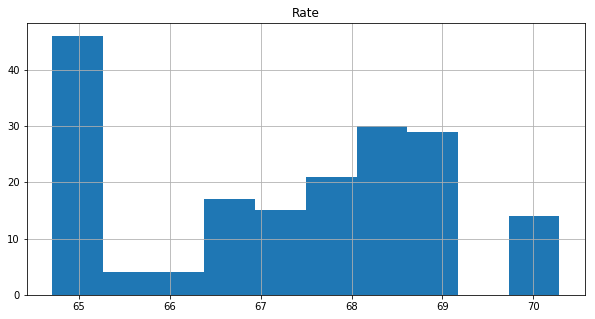

In [9]:
# Plot a histogram
rate_data.hist()
plt.show()

It is clear from the histogram that values appear with the most frequency around 65. However, there is also a huge frequency in the range 67-69. Because the series is a time series, it tells that the values were constant around 65 for a long time, jumped suddenly to about 66.5, remained in the range of 66.5-69 for some time. The rate briefly touch a little over 70 and either is still there or dropped a short while later. Plot of the series against time is necessary at this point to conclude stronger claims.

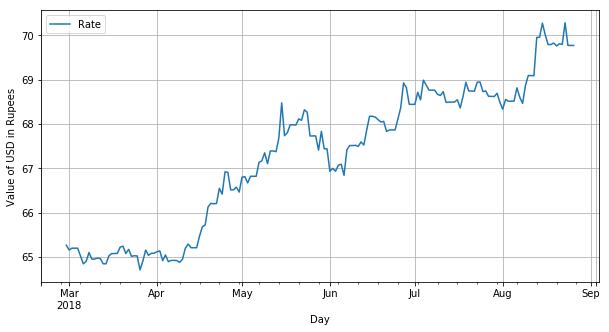

In [10]:
plt.rcParams["figure.figsize"] = fig_size
rate_data.plot()
plt.ylabel('Value of USD in Rupees')
plt.grid()

## Stationarity analysis

<p> <font style="FONT-SIZE:15px; COLOR:#000000; LINE-HEIGHT:25px; FONT-FAMILY:Arial,Helvetica,sans-serif">
&emsp;&emsp;A time series is said to be stationary if its mean, variance and autocorrelation structure are constant with respect to the time-horizon of the series. In a stationary time series, recognizing patterns in the data is not affected by trends because we start by getting rid of the trend. Therefore, it is easier to forecast a stationary time series than a non-stationary series. It is practically impossible to obtain a series that is completely stationarity. For this reason, in time series analysis, a stationary series refers to a weakly stationary series and many forecasting models are based on the assumption of weak stationarity. There are certain transformations which are implemented to reduce a non-stationary time series in the weakly stationary form. For the sake of this study, we consider, the following transformations <br>
    &emsp;- Difference between moving average and data points (also called rolling mean),<br>
    &emsp;- Difference between moving average and the data points after logrithmic transformation,<br>
    &emsp;- Difference between data points and exponentially weighted moving average (EWMA),<br>
    &emsp;- First order differencing, and, <br>
    &emsp;- Decomposition of series into trend, seasonality and residuals.


### Evaluating stationarity

<p> <font style="FONT-SIZE:15px; COLOR:#000000; LINE-HEIGHT:25px; FONT-FAMILY:Arial,Helvetica,sans-serif">
&emsp;&emsp; Weak stationarity requires that all the roots of the autoregressive lag polynomial must be greater than one. If they are equal to or lesser than one, our assumption of staionarity fails. We use the Augmented Dickey-Fuller (ADF) test for testing stationarity of a transformed series. ADF tests for the null hypothesis that the series has a unit root. Consequently, after performing the hypothesis test, the indicators returned by ADF that are in our favor (those which indicate stationarity) are: <br>
    &emsp;&emsp;1. A high absolute value of t-statistic (preferably higher than 1% critical value), and, <br>
    &emsp;&emsp;2. Value of 'p-value' very close to zero. <br>
A trend can evidently be seen in the series. Raw series (without transformation) does not appear to be stationarity by visual analysis alone. However, the ADF should be performed on this series as well to access possible improvements.

In [11]:
# ADF test on raw data (without transformation)

df_test = adfuller(rate_data['Rate'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                  -0.524713
p-value                          0.887103
#Lags Used                       1.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


#### Conclusions:
1. Absolute value of t-statistic is much lesser than any critical value. <br>
2. p-value is very close to 1 than 0. <br><br>
Therefore, we accept the null hypothesis. In other words, this series is far from stationarity.<br>
In the following section, a few possible methods of inducing stationarity are evaluated.


### Introducing stationarity

### 1. Difference between data and moving average

In this transformation, the trend is evaluated by subtracting rolling mean of data points over a specified time window from the original series. <br>


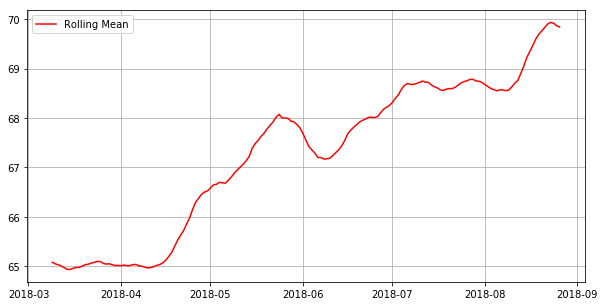

In [12]:
# Calculate and plot the rolling mean

rolling_mean = pd.Series.rolling(rate_data['Rate'],window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
#rate_data.plot()
rmean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.grid()
plt.show()

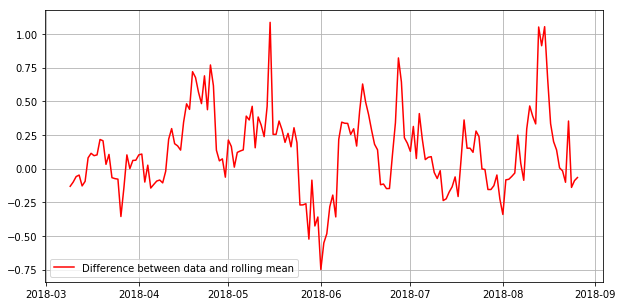

In [13]:
# Subtract rolling mean from the data and plot

rolling_mean_diff=rate_data['Rate']-rolling_mean
#plt.rcParams["figure.figsize"] = fig_size
plt.plot(rolling_mean_diff, color='red',label='Difference between data and rolling mean')
plt.legend(loc='best')
plt.grid()
plt.show()
rolling_mean_diff.dropna(inplace=True)

In [14]:
# ADF on transformed data
df_rmean_diff = adfuller(rolling_mean_diff, autolag='AIC')
result_rmean_diff = pd.Series(df_rmean_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_rmean_diff[4].items():
    result_rmean_diff['Critical Value (%s)'%key] = value
print (result_rmean_diff)

Test Statistic                  -4.711797
p-value                          0.000080
#Lags Used                       0.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


#### Conclusions:
1. In this case, the absolute value of t-statistic is greater even than 1% critical value. Therefore, we can reject null hypothesis with more than 99% confidence.<br>
2. The p-value is also almost zero.<br><br>
This is an acceptable level of stationarity. However, in most cases, a better degree of stationarity can be obtained.

### 2. Moving average of log(data)

It is a very common practice to take the logarithmic transform of the data to compress possible deviations. Here, we take the logarithm of the data, calculate the rolling mean of the logarithm and subtract it from the logarithmic transform.

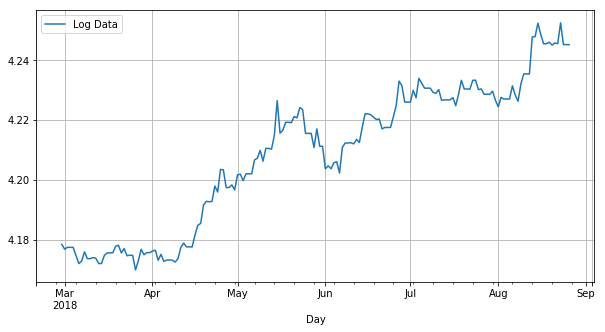

In [15]:
# Calculate and plot logarithm of the data
rate_data_log=np.log(rate_data['Rate'])
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

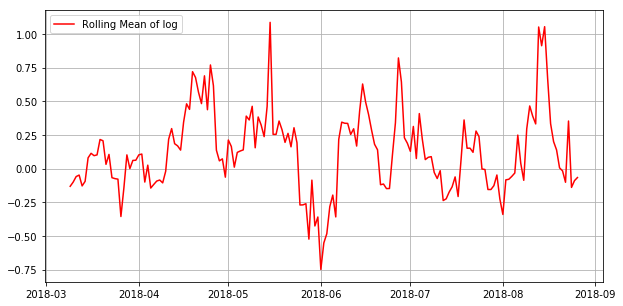

In [16]:
# Calculate and plot differnece between rolling mean of logarithm and the logarithm
log_rolling_mean=pd.Series.rolling(rate_data_log,window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
log_rolmean_diff=rate_data_log-log_rolling_mean
log_rmean_diff= plt.plot(rolling_mean_diff, color='red', label='Rolling Mean of log')
plt.legend(loc='best')
plt.grid()
plt.show()
log_rolmean_diff.dropna(inplace=True)

In [17]:
# Perform ADF on the transformation
df_test_log = adfuller(log_rolmean_diff, autolag='AIC')
result_log = pd.Series(df_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_log[4].items():
    result_log['Critical Value (%s)'%key] = value
print (result_log)

Test Statistic                  -4.693747
p-value                          0.000086
#Lags Used                       0.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


#### Conclusion:
1. The absolute value of t-statistic is still greater than 1% critical value, but lesser than the previous transformation.<br>
2. The p-value is also a little worse than before.<br> <br>
Because we can still assert with more than 99% confidence that the series is weakly stationarity, we do not reject this transformation. This one is almost as good as the earlier one. However, because of the benefits of logarithmic transformation, we will prefer this over the earlier tranformation.

### 3. Exponentially Weighted Moving Average of Log

In this step, instead of taking the moving average, we take the exponentially weighted moving average and perform similar analysis.

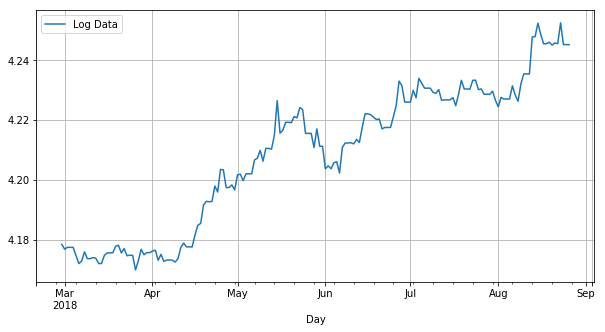

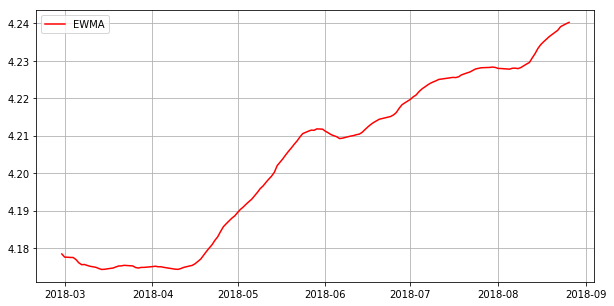

In [18]:
ewma_data=pd.Series.ewm(rate_data_log,halflife=10,min_periods=0,adjust=True,ignore_na=False).mean()
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate EWMA and plot
plt.plot(ewma_data, color='red',label='EWMA')
plt.legend()
plt.legend(loc='best')
plt.grid()
plt.show()

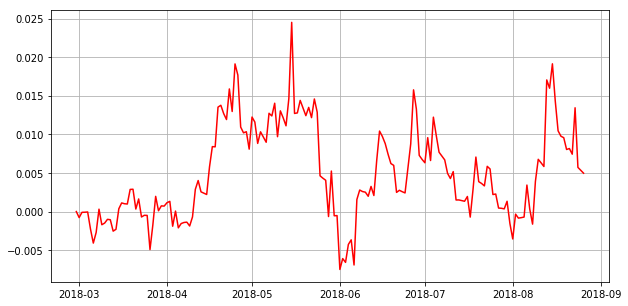

In [19]:
# Calculate and plot difference

ewma_diff=rate_data_log-ewma_data
plt.rcParams["figure.figsize"] = fig_size
plt.plot(ewma_diff, color='red')
plt.grid()
plt.show()

In [20]:
# Perform ADF test

df_test_ewma = adfuller(ewma_diff, autolag='AIC')
result_ewma = pd.Series(df_test_ewma[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_ewma[4].items():
    result_ewma['Critical Value (%s)'%key] = value
print (result_ewma)

Test Statistic                  -2.943287
p-value                          0.040541
#Lags Used                       1.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


#### Conclusion:
1. The value of t-statistic has worsened. We can now reject the null hypothesis with a confidence of almost 95%. <br>
2. The p-value has also worsened. <br><br>
For these reasons, we reject this transformation. So far, transformation #2 is the best one.

### 4. First order differencing

First order differencing is probably the single most widely used transformation in time series. This transformation is taken  by subtracting consecutive points of the series. Even though the first point is lost, this does not matter a lot given the length of the series.

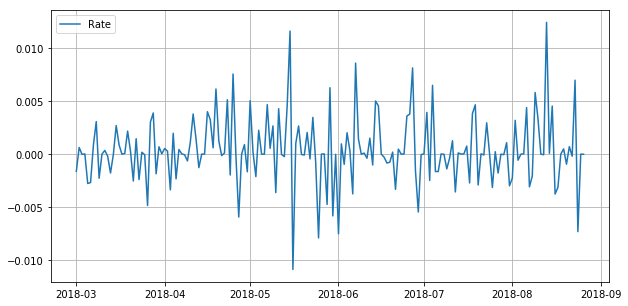

In [21]:
# Calculate and plot the first order differnece

rate_log_diff = rate_data_log - rate_data_log.shift()
rate_log_diff.dropna(inplace=True)
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [22]:
# Perform ADF test

df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

Test Statistic                -1.589821e+01
p-value                        8.387724e-29
#Lags Used                     0.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


#### Conclusion:
1. The t-statictic value is impressive. We can reject the null hypothesis with a confidence much more than 99%. <br>
2. P-value is almost zero. <br><br>

So far, this is the best transformation.

### 5. Decomposition (Trend+Seasonal+Residual)
The logarithm of the series is decomposed into trend, seasonality and residual.

In [23]:
# Decompose logarithm of the series
rate_data_log=np.log(rate_data['Rate'])
decomposition = seasonal_decompose(rate_data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

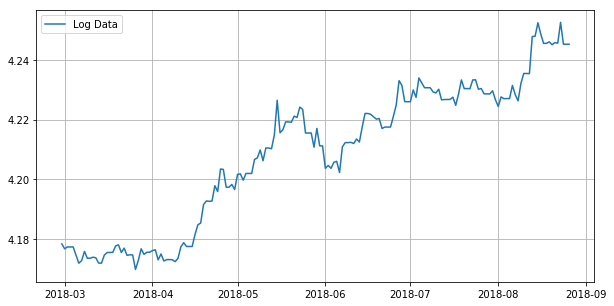

In [24]:
# Plot logarithm of series
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_data_log,label='Log Data')
plt.legend()
plt.grid()
plt.show()

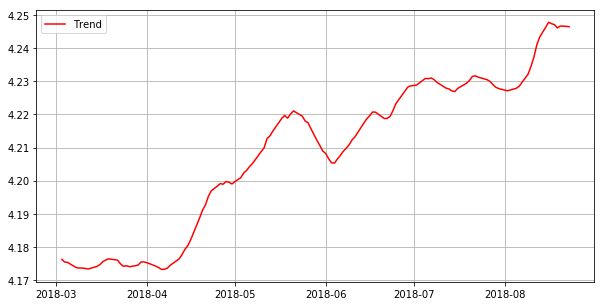

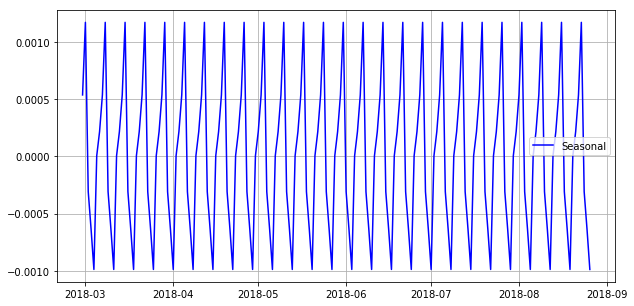

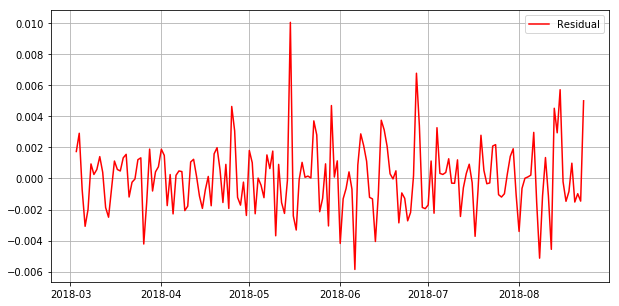

In [25]:
# Plot trend, seasonality and residual
plt.plot(trend,color='red',label='Trend')
plt.legend()
plt.grid()
plt.show()

plt.plot(seasonal,color='Blue',label='Seasonal')
plt.legend()
plt.grid()
plt.show()

plt.plot(resid,color='red',label='Residual')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Perform ADT
resid.dropna(inplace=True)

df_test_resid = adfuller(resid, autolag='AIC')
result_resid = pd.Series(df_test_resid[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_resid[4].items():
    result_resid['Critical Value (%s)'%key] = value
print (result_resid)

Test Statistic                -8.030598e+00
p-value                        1.963128e-12
#Lags Used                     5.000000e+00
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


#### Conclusion:
1. T-statistic of residuals is fairly good. Even in this case, the null hypothesis can be rejected with more than 99% confidence.<br>
2. P-value is almost zero. <br> <br>
Although, this transformtion returns a series with accepted level of stationerity, first order differecning outperforms this.

In [27]:
compare=pd.DataFrame({'Test Statistic':[result_rmean_diff.iloc[0],result_log.iloc[0],result_ewma.iloc[0],result_logdiff.iloc[0],result_resid.iloc[0]],
                      'p-value':[result_rmean_diff.iloc[1],result_log.iloc[1],result_ewma.iloc[1],result_logdiff.iloc[1],result_resid.iloc[1]]})
Methods=['Data Rolling mean','Log Data Rolling Mean','Log EWMA','First Order Differencing','Seasonal Decomposition']
compare['Methods']=Methods
compare=compare.set_index('Methods')
compare

Test Statistic       p-value
Methods                                               
Data Rolling mean              -4.711797  7.996194e-05
Log Data Rolling Mean          -4.693747  8.645857e-05
Log EWMA                       -2.943287  4.054092e-02
First Order Differencing      -15.898214  8.387724e-29
Seasonal Decomposition         -8.030598  1.963128e-12

Evidently, first order differencing gives the best smoothing to the data. It is very commonly used for making time series stationary because it seldom fails. However, we explored a few other smoothing techniques only to be sure. <br>
First order differencing is selected to transform the series.

### Determine time lags

The general that can be followed to decide the orders of the autoregression (AR) and moving average (MA) is listed in the table below.

![title](acf_pacf.png)

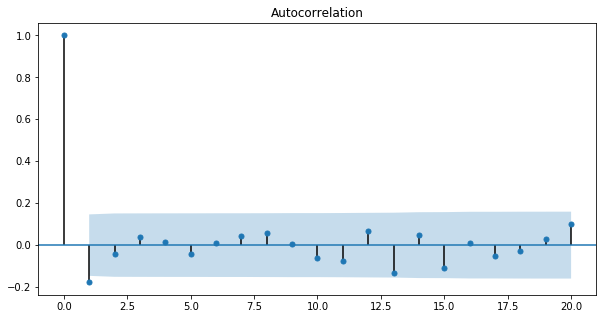

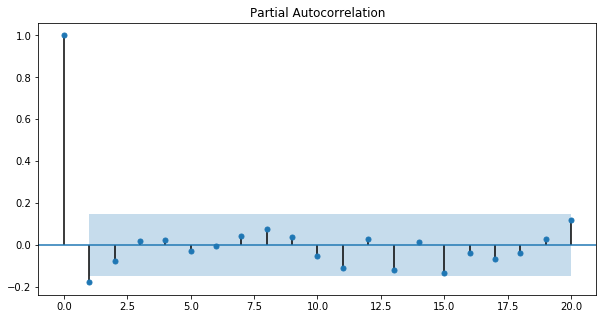

In [28]:
plot_acf(rate_log_diff,lags=20)
plt.show()

plot_pacf(rate_log_diff,lags=20)
plt.show()

In this case, both ACF and PACF cut-off after the first lag. There is no rigid indication of the orders p and q as required by ARIMA. The closest contenders are ARIMA(1,1,1) and ARIMA(1,1,0). We shall analyze both of these methods.

## Forecast

After we have figured out the possible correlation of values with their lags, in this section, we will model an ARIMA model, a feedforward neural network (FNN) and long term short memory (LSTM) recurrent neural network (RNN) to fit the data. Usually, models for univariate time series analysis, such as this one, do not generalize well for multi-step ahead prediction, unless there is a good correlation with the lagged values. Since, our ACF and PACF do not indicate an appreciable correlation with lagged values, we will limit our prediction to only one data point after the last data point.

#### Autoregressive Integrated Moving Average (ARIMA)

In [29]:
data1 = rate_data_log.values
train = list(data1[0:125])
train_ = list(data1[0:125])
test = list(data1[125:])
otest = list(data1[125:0])

train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,1,0))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(test[t]))

C:\Users\kdabhadk\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
full_predictions=list(fit.forecast(34)[0])

Mean squared error: 0.046362


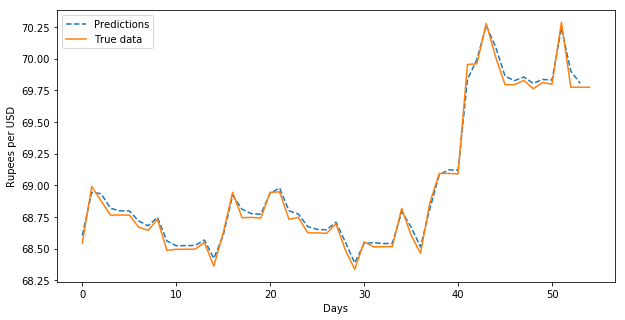

In [31]:
plt.plot(np.exp(predictions)[1:],'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))

In [32]:
## Value of currency tomorrow will be:

#Tomorrow's value
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])

tomorrow_value = np.exp(forecast)

# Today's value

rate_data_log = rate_data_log[:-1]
data1 = rate_data_log.values
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])
today_value = np.exp(forecast)

In [33]:
rate_data.tail()

Rate
Day                
2018-08-22  69.7988
2018-08-23  70.2874
2018-08-24  69.7753
2018-08-25  69.7753
2018-08-26  69.7745

In [34]:
print ("Today's actual value is {0:3f} and model predicted {1:3f}.".format(rate_data.values[-1][0],today_value))
print ("Model predicts value will be {0:3f} tomorrow.".format(tomorrow_value))

Today's actual value is 69.774500 and model predicted 69.806353.
Model predicts value will be 69.805514 tomorrow.


#### Predicting for all 55 days in advance

Mean squared error: 9.008066


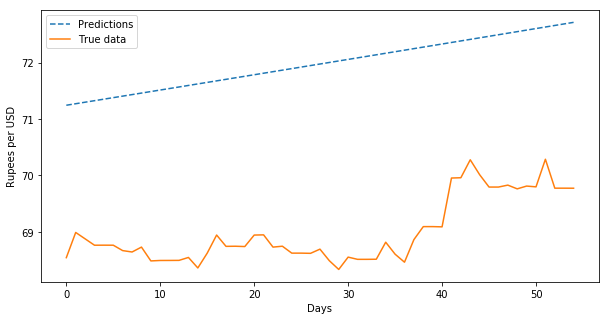

In [35]:
train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,1,0))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(forecast))

predictions = fit.forecast(len(test))[0]
plt.plot(np.exp(predictions),'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))

Since, ARIMA is a linear model, forecasting using ARIMA for anywhere more than 1 day fails miserably.
The model continues the upward increasing trend indifinitely.

Let's try to see how a simple feedforward neural (FNN) and LSTM Recurrent Neural Network (RNN) performs with this time series data.

### Feedforward Neural Network (FNN)
Code template is adopted from https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/Time%20Series%20Prediction.ipynb <br>
The RNN is adjusted to suit as per requirement.

In [36]:
data1 = rate_data_log.values
train = list(data1[0:125])
test = list(data1[125:])

In [37]:
def gen_XY(t_list,size):
    '''
    Generates an autoregressive lagged array.
    
    Parameters
    ----------
    1. t_list: (list) Data to generate an autoregressive array out of.
    2. size: (int) Number of lagged values to consider.
    
    Returns
    ----------
    1. X: (np.ndarray) Autoregressive feature array.
    2. Y.T: (np.ndarray) Column array with values of response variable.
    
    '''
    X = np.zeros([1,size])
    Y = []
    temp_list=[]
    for i in range(len(t_list)-size):
        add_list = t_list[i:i+size]
        target = t_list[i+size]
        X = np.append(X,np.array([add_list]),axis=0)
        Y.append(target)
        
    X = np.delete(X,0,axis=0)
    Y = np.array(Y)
    
    return X,Y.T       

In [38]:
X_train,y_train = gen_XY(train,1)
X_test,y_test = gen_XY(test,1)

### 1 Hidden Layers with 1 neuron and relu activation function

In [39]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
124/124 [==============================] - 0s 1ms/step - loss: 11.9732
Epoch 2/20
124/124 [==============================] - 0s 81us/step - loss: 11.6894
Epoch 3/20
124/124 [==============================] - 0s 48us/step - loss: 11.4075
Epoch 4/20
124/124 [==============================] - 0s 81us/step - loss: 11.1291
Epoch 5/20
124/124 [==============================] - 0s 48us/step - loss: 10.8561
Epoch 6/20
124/124 [==============================] - 0s 81us/step - loss: 10.5883
Epoch 7/20
124/124 [==============================] - 0s 81us/step - loss: 10.3251
Epoch 8/20
124/124 [==============================] - 0s 73us/step - loss: 10.0667
Epoch 9/20
124/124 [==============================] - 0s 73us/step - loss: 9.8133
Epoch 10/20
124/124 [==============================] - 0s 64us/step - loss: 9.5650
Epoch 11/20
124/124 [==============================] - 0s 40us/step - loss: 9.3212
Epoch 12/20
124/124 [==============================] - 0s 48us/step - loss: 9.0823
Epoch 

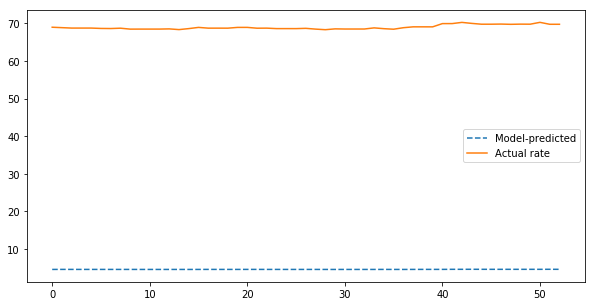

MSE: 4148.777021


In [40]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

Very poor fit to the data.

### 2 Hidden Layers with 50 neurons each and ReLU activation function

In [41]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
124/124 [==============================] - 0s 1ms/step - loss: 38.1635
Epoch 2/20
124/124 [==============================] - 0s 48us/step - loss: 11.0169
Epoch 3/20
124/124 [==============================] - 0s 48us/step - loss: 1.1708
Epoch 4/20
124/124 [==============================] - 0s 65us/step - loss: 0.2658
Epoch 5/20
124/124 [==============================] - 0s 97us/step - loss: 0.7602
Epoch 6/20
124/124 [==============================] - 0s 81us/step - loss: 0.3971
Epoch 7/20
124/124 [==============================] - 0s 97us/step - loss: 0.0440
Epoch 8/20
124/124 [==============================] - 0s 105us/step - loss: 0.0175
Epoch 9/20
124/124 [==============================] - 0s 97us/step - loss: 0.0346
Epoch 10/20
124/124 [==============================] - 0s 97us/step - loss: 0.0111
Epoch 11/20
124/124 [==============================] - 0s 64us/step - loss: 5.2566e-04
Epoch 12/20
124/124 [==============================] - 0s 89us/step - loss: 0.0023
Epoch 1

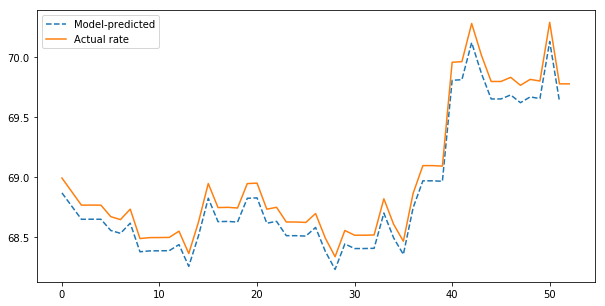

MSE: 0.069470


In [42]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred)[1:],'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

### 4 Hidden Layers with 100 neurons each and ReLU activation function

In [43]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
124/124 [==============================] - 0s 2ms/step - loss: 16.5769
Epoch 2/20
124/124 [==============================] - 0s 65us/step - loss: 0.8718
Epoch 3/20
124/124 [==============================] - 0s 56us/step - loss: 0.8912
Epoch 4/20
124/124 [==============================] - 0s 56us/step - loss: 0.2361
Epoch 5/20
124/124 [==============================] - 0s 64us/step - loss: 0.1045
Epoch 6/20
124/124 [==============================] - 0s 65us/step - loss: 0.0745
Epoch 7/20
124/124 [==============================] - 0s 56us/step - loss: 0.0115
Epoch 8/20
124/124 [==============================] - 0s 64us/step - loss: 0.0141
Epoch 9/20
124/124 [==============================] - 0s 97us/step - loss: 0.0052
Epoch 10/20
124/124 [==============================] - 0s 73us/step - loss: 0.0012
Epoch 11/20
124/124 [==============================] - 0s 97us/step - loss: 0.0011
Epoch 12/20
124/124 [==============================] - 0s 73us/step - loss: 5.2486e-04
Epoch 13/

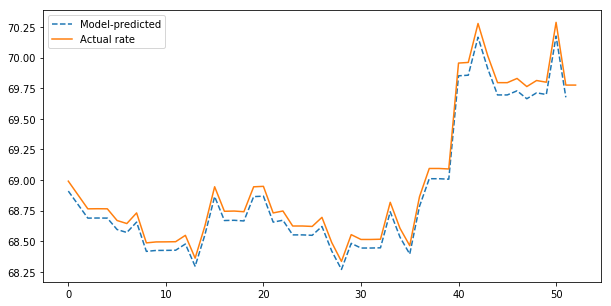

MSE: 0.058898


In [44]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred)[1:],'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

### LSTM- Recurrent Neural Network (LSTM-RNN)

In [45]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [46]:
X_tr_t.shape

(124, 1, 1)

In [47]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(10,input_shape=(1, X_train.shape[1]), activation='relu'))

model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
124/124 [==============================] - 1s 6ms/step - loss: 6.2251
Epoch 2/200
124/124 [==============================] - 0s 1ms/step - loss: 0.4779
Epoch 3/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 4/200
124/124 [==============================] - 0s 1ms/step - loss: 1.2417e-05
Epoch 5/200
124/124 [==============================] - 0s 1ms/step - loss: 1.3750e-05
Epoch 6/200
124/124 [==============================] - 0s 1ms/step - loss: 1.3837e-05
Epoch 7/200
124/124 [==============================] - 0s 1ms/step - loss: 1.3836e-05
Epoch 8/200
124/124 [==============================] - 0s 1ms/step - loss: 1.3806e-05
Epoch 9/200
124/124 [==============================] - 0s 1ms/step - loss: 1.3747e-05
Epoch 00009: early stopping


In [48]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

print("The MSE on the Train set is:\t{:0.3f}".format(MSE(np.exp(y_train), np.exp(y_train_pred_lstm))))
print("The MSE on the Test set is:\t{:0.3f}".format(MSE(np.exp(y_test), np.exp(y_pred_test_lstm))))

The MSE on the Train set is:	0.073
The MSE on the Test set is:	0.058


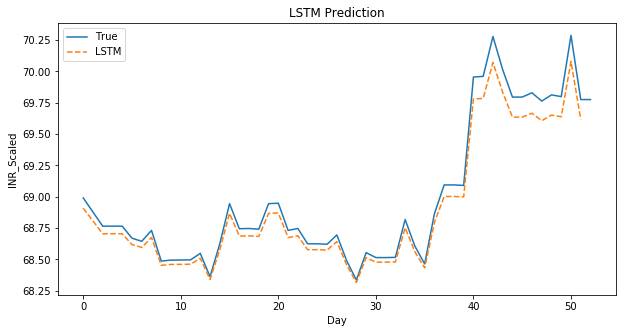

In [49]:
plt.plot(np.exp(y_test), label='True')
plt.plot(np.exp(y_pred_test_lstm)[1:],'--',label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Day')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()